# Day 16

In [48]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# 결합 확률과 조건부 확률

확률론에서는 하나의 사건(부분 집합)을 **선택된 표본이 포함되어 있을 수 있는 하나의 부분 집합**으로 본다. 따라서 하나의 사건(부분 집합)은 **"선택된 표본이 이 사건(부분 집합) 안에 있다"라는 주장** 혹은 가설이라고도 생각할 수 있다. 

따라서 **사건(부분 집합)의 확률**은 그 **사건(부분 집합)이 선택된 표본을 포함할 가능성**, 즉, 그 주장이 진실일 가능성, 다른말로 가설의 신뢰도를 뜻한다.

베이지안 확률론의 장점은 추가적인 정보가 발생하였을 때 이 추가 정보를 사용하여 기존에 가지고 있던 확률 즉, 어떤 가설에 대한 신뢰도를 좀 더 정확하게 수정할 수 있다는 점이다.

추가적인 정보는 보통 또다른 사건의 형태로 발생한다. 즉 **"어떤 또다른 사건이 진짜로 발생했다"**는 말은 **"실제로 발생한 표본이 확실하게 포함된 새로운 집합을 알게 되었다"**는 의미이다.

## 범인 찾기의 예

예를 들어 살인 사건이 발생하였다고 가정하자. 

경찰은 전체 용의자 목록을 가지고 있으며 베이지안 확률론 관점에서 이 용의자 목록이 바로 표본 공간이다. 우리가 알고 싶은 것은 전체 용의자 목록(표본 공간)에서 누가 범인(실제로 발생한 표본)인가 하는 점이다. 

현재 표본 공간은 20명의 용의자로 구성되어 있으며 이 중 남자가 12 명, 여자가 8 명이라고 가정해 보자.

만약 담당 형사가 범인은 남자라고 생각한다면, "범인이 남자이다."라는 주장은 확률론적 관점에서 남성인 용의자(표본)로만 이루어진 사건(표본 공간의 부분 집합)이 된다. 이를 사건 $A$ 라고 하자.

이 때 우리가 관심을 가지는 것은 "범인이 남자"라는 사건 $A$의 신뢰도 즉, 사건 $A$의 확률 $P(A)$ 이다. 아무런 추가 정보가 없다면 모든 사람이 범인일 가능성이 같기 때문에 범인이 남자일 확률 $P(A)$는 다음과 같이 전체 용의자의 수로 남자 용의자의 수를 나눈
 값이 된다.

$$ P(A) = \dfrac{12}{12 + 8} = \dfrac{12}{20} = 0.6 $$

이 때 새로운 사건 $B$ 가 발생하였다고 하자. 바로 범인의 머리카락이 발견된 것이다. 발견된 범인의 머리카락에서 범인은 머리가 길다는 사실을 알게되었다.

<img src="https://datascienceschool.net/upfiles/56d3472588664eca851f098acda40e54.jpeg" style="width:60%">

이 새로운 사건 $B$ 은 확률론적으로는 새로운 용의자 목록, 즉 머리카락이 긴 사람의 목록이라는 표본 공간의 새로운 부분 집합을 의미한다. 그리고 사건 $B$가 발생했다는 것은 이 용의자 목록에 진짜로 범인이 포함되었다는 뜻이다. 

현재 표본 공간 즉, 전체 용의자 목록에는 머리가 긴 사람이 10 명, 머리가 짧은 사람이 10 명이 있다.

만약 이 사건이 진실이라는 보장이 없다면, 사건 $B$에 대한 확률 $P(B)$, 즉 머리가 긴 사람이 범이라는 주장의 신뢰도는 다음과 같다.

$$ P(B) = \dfrac{10}{10 + 10} = \dfrac{10}{20} = 0.5 $$

지금까지의 상황을 요약해 보자.

* 살인 사건 발생
* 용의자는 20명
    * 남자 12명, 여자 8명
    * 머리가 긴 사람 10명, 머리가 짧은 사람 10명
* 범인이 남자일 확률 
    * 남자의 집합(사건) $A$에 범인(선택된 표본)이 속해 있다는 주장의 신뢰도: $P(A) = 0.6$
* 범인이 머리가 길 확률 
    * 머리가 긴 사람의 집합(사건) $B$에 범인(선택된 표본)이 속해 있다는 주장의 신뢰도: $P(B) = 0.5$ 
* 실제로는 범인이 머리가 길다.

## 결합 확률과 조건부 확률

베이지안 확률론은 두 사건 $A$와 $B$의 관계를 알고 있다면 사건 $B$가 발생하였다는 사실로 부터 기존에 알고 있는 사건 $A$에 대한 확률 $P(A)$를 좀 더 정확한 확률로 바꿀 수 있는 방법을 알려준다.

이를 위해서는 결합 확률과 조건부 확률이라는 두 가지 개념을 정의해야 한다.

**결합 확률(joint probability)**은 **사건 $A$와 $B$가 동시에 발생할 확률**이다. 다음과 같이 표기한다.

$$ P(A \cap B) \text{ 또는 } P(A, B) $$

또한 $B$가 사실일 경우의 사건 $A$에 대한 확률을
 **사건 $B$에 대한 사건 $A$의 조건부 확률(conditional probability)**이라고 하며 다음과 같이 표기한다.


$$ P(A | B) $$

조건부 확률은 다음과 같이 정의한다.

$$ P(A|B) = \dfrac{P(A,B)}{P(B)} $$

조건부 확률이 위와 같이 정의된 근거는 다음과 같다.

1. 사건 $B$가 사실이므로 모든 가능한 표본은 사건 $B$에 포함되어야 한다. 즉,  표본 공간 $\Omega \rightarrow B$가 된다.
1. 사건 $A$의 원소는 모두 사건 $B$의 원소도 되므로 사실상 사건 $A \cap B$의 원소가 된다. 즉, $A \rightarrow A \cap B$가 된다.
1. 따라서 사건 $A$의 확률 즉, 신뢰도는 원래의 신뢰도(결합 확률)를 새로운 표본 공간의 신뢰도(확률)로 정규화(normalize)한 값이라고 할 수 있다.


* 조건부 확률 $P(A|B)$ 
  * 사건 B가 발생한 경우의 사건 A의 확률
  * 표본이 이벤트 B에 속한다는 새로운 **사실**을 알게 되었을 때, 
  * 이 표본이 사건 A에 속한다는 사실의 정확성(신뢰도)이 어떻게 변하는지를 알려준다.


* 예를 들어, 범인 찾기 문제에서
  * $P(A)$: 범인이 남자일 확률
  * $P(B)$: 범인이 머리가 길 확률
  * $P(A|B)$: 범인이 머리가 길다는 **사실**을 알게 되었을 때, 달라진(갱신된) "범인이 남자일 확률"


* 조건부 확률의 값

$$ P(A|B) = \dfrac{P(A,B)}{P(B)} $$

여기서 주의할 점은 사건 $A$와 사건 $B$의 결합 확률의 값 $P(A,B)$은 기존의 사건 $A$의 확률 $P(A)$나 사건 $B$의 확률 $P(B)$와는 전혀 무관한 별개의 정보이다. 즉, 수학적으로 계산하여 구할 수 있는 값이 아니라 외부에서 주어지지 않으면 안되는 정보인 것이다.

앞서 예를 들었던 범인 찾기의 경우에도 이미 주어진 정보 $P(A)$, $P(B)$와 관계없이 $P(A,B)$는 여러 가지 경우가 있을 수 있다. 

한 예를 들어 10명의 남자 중 머리가 긴 사람이 다음과 같이 3명일 수도 있고

<table class="table-bordered" style="width:90%">
  <tr>
    <td></td>
    <td>범인이 머리가 길다: $P(B)=0.5$</td>
    <td>범인이 머리가 길지 않다</td> 
    <td>계</td> 
  </tr>
  <tr>
    <td>범인이 남자다: $P(A)=0.6$</td>
    <td>3명 $\;\;\;P(A,B) = \dfrac{3}{20}$</td>
    <td>9명</td>
    <td>12명</td>
  </tr>
  <tr>
    <td>범인이 여자다</td> 
    <td>7명 </td>
    <td>1명</td> 
    <td>8명</td> 
  </tr>
  <tr>
    <td>계</td> 
    <td>10명 </td>
    <td>10명</td> 
    <td></td> 
  </tr>
</table>

또 다른 경우에는 10명의 남자 중 머리가 긴 사람이 다음과 같이 6명일 수도 있다.

<table class="table-bordered" style="width:90%">
  <tr>
    <td></td>
    <td>범인이 머리가 길다: $P(B)=0.5$</td>
    <td>범인이 머리가 길지 않다</td> 
    <td>계</td> 
  </tr>
  <tr>
    <td>범인이 남자다: $P(A)=0.6$</td>
    <td>6명: $\;\;\;P(A,B) = \dfrac{6}{20}$</td>
    <td>6명</td>
    <td>12명</td>
  </tr>
  <tr>
    <td>범인이 여자다</td> 
    <td>4명 </td>
    <td>4명</td> 
    <td>8명</td> 
  </tr>
  <tr>
    <td>계</td> 
    <td>10명 </td>
    <td>10명</td> 
    <td></td> 
  </tr>
</table>

이 두가지 경우에 대해 조건부 확률 $P(A|B)를 구해보자.

만약 머리가 긴 남자가 3명이라면

$$ P(A|B) = \dfrac{P(A, B)}{P(B)} = \dfrac{3/20}{10/20}  = \dfrac{3}{10} $$ 

이 된다. 원래 사건 $A$의 확률 $P(A)$가 0.6 즉 60% 였으므로 범인이 머리카락이 길다는 정보로 인해 남자가 범인일 확률은 절반으로 뚝 떨어졌다.

만약 머리가 긴 남자가 6명이라면

$$ P(A|B) = \dfrac{P(A, B)}{P(B)} = \dfrac{6/20}{10/20}  = \dfrac{6}{10} $$ 

이 된다.

이 경우에는 새로운 정보(사건 $B$)가 주어지든 주어지지 않았든 남자가 범인일 확률은 변함없다. 이러한 경우에는 사건 $A$가 사건 $B$와 서로 독립(independent)이라고 한다.

## 독립

수학적으로는 사건 $A$와 사건 $B$의 결합 확률의 값이 다음과 같은 관계가 성립하면 두 사건 $A$와 $B$는 서로 독립(independent)라고 정의한다. 

$$ P(A,B) = P(A)P(B) $$

독립인 경우 조건부 확률과 원래의 확률이 같아짐을 알 수 있다. 즉, $B$ 라는 사건이 발생하든 말든 사건 $A$ 에는 전혀 영향을 주지 않는 다는 것이다.


$$ P(A|B) = \dfrac{P(A,B)}{P(B)} = \dfrac{P(A)P(B)}{P(B)} = P(A) $$

# 베이즈 정리

### 중요 개념

* 베이즈 정리
* 사전 확률, 사후 확률, 우도, 정규화 상수
* 베이즈 정리의 확장

베이즈 정리는 사건 $B$가 발생함으로써 사건 $A$의 확률이 어떻게 변화하는지를 표현한 정리이다. 

사건 $B$가 발생하였다는 것은 우리가 찾는 샘플이 사건 $B$라는 부분집합에 포함되어 있다는 새로운 정보를 취득하였다는 의미이다. 따라서 베이즈 정리는 새로운 정보가 기존의 의사 결정에 어떻게 영향을 미치는지를 설명하고 있다.

베이즈 정리는 다음과 같은 수식으로 나타난다.


$$ P(A|B) = \dfrac{P(B|A)P(A)}{P(B)} $$


여기에서 $P(A)$는 **사전 확률(prior)**이라고 하며 사건 B가 발생하기 전에 가지고 있던 사건 A의 확률이다. 만약 사건 B가 발생하게 되면 이 정보를 반영하여 사건 $A$의 확률은 $P(A|B)$라는 값으로 변하게 되며 이를 **사후 확률(posterior)**이라고 한다.

사후 확률 값은 기존 확률값에 $P(B|A)/P(B)$라는 값을 곱하면 얻을 수 있다. 곱하는 $P(B|A)$는 **우도(likelihood)**라고 하고 나누는 $P(B)$는 **정규화 상수(normalizing constant)**라고 한다.


$$ P(A|B) = \dfrac{P(B|A)P(A)}{P(B)} $$


* $P(A|B)$: 사후 확률(posterior). 사건 B가 발생한 후 갱신된 사건 A의 확률
* $P(A)$: 사전 확률(prior). 사건 B가 발생하기 전에 가지고 있던 사건 A의 확률
* $P(B|A)$: 우도(likelihood). 사건 A가 발생한 경우 사건 B의 확률
* $P(B)$: 정규화 상수(normalizing constant): 확률의 크기 조정


베이즈 정리는 다음과 같이 증명한다.


(증명)



$$ P(A|B) = \dfrac{P(A,B)}{P(B)} \;\; \rightarrow \;\; P(A,B) = P(A|B)P(B) $$

$$ P(B|A) = \dfrac{P(A,B)}{P(A)} \;\; \rightarrow \;\; P(A,B) = P(B|A)P(A) $$

$$ P(A,B) = P(A|B)P(B) = P(B|A)P(A) $$

$$ P(A|B) = \dfrac{P(B|A)P(A)}{P(B)} $$

## 베이즈 정리의 확장 1

만약 사건 $A_i$가 다음의 조건을 만족하는 경우,

* 서로 교집합이 없고

$$ A_i \cap A_j = \emptyset $$


* 모두 합쳤을 때 (합집합) 전체 표본 공간이면

$$ A_1 \cup A_2 \cup \cdots = \Omega $$ 
    

전체 확률의 법칙을 이용하여 다음과 같이 베이즈 정리를 확장할 수 있다.

$$ P(A_1|B) = \dfrac{P(B|A_1)P(A_1)}{\sum_i P(B|A_i)P(A_i)} $$


$A_1 = A$, $A_2 = A^C$ 인 경우에는 다음과 같다.

$$ P(A|B) = \dfrac{P(B|A)P(A)}{P(B|A)P(A) + P(B|A^C)P(A^C)}  = \dfrac{P(B|A)P(A)}{P(B|A)P(A) + P(B|A^C)(1 - P(A))} $$

## 검사 시약 문제

베이즈 정리를 이용하여 다음과 같은 문제를 풀어보자.

제약사에서 환자가 특정한 병에 걸린지 확인할 수 있는 시약을 만들었다. 그 병에 걸린 환자에게 시약을 테스트한 결과 99%의 확률로 양성 반응을 보였다. 병에 걸린지 확인이 되지 않은 어떤 환자가 이 시약을 테스트한 결과 양성 반응을 보였다면 이 환자가 그 병에 걸려 있을 확률은 얼마인가? 99%일까?

이 문제를 확률론의 용어로 다시 정리하여 서술하여 보자.

우선 환자가 실제로 병에 걸린 경우를 사건 $D$ 라고 하자. 그러면 병에 걸려있지 않은 경우는 사건 $D^C$ 가 된다.
또 시약 테스트에서 양성 반응을 보이는 경우를 사건 $S$ 라고 하면 음성 반응을 보이는 경우는 사건 $S^C$ 이다.

현재 주어진 확률 값은 병에 결린 환자에게 시약을 테스트하였을 때 양성 반응을 보이는 확률이다. 병에 걸렸다는 것은 추가된 조건 혹은 정보이므로 이 확률은 $P(S|D)$로 표기할 수 있다.

그런데 우리가 구해야 하는 값은 이것과 반대로 양성 반응을 보이는 환자가 병에 걸려있을 확률이다. 이 때에는 양성 반응을 보인다라는 것이 추가된 정보이므로 이 확률은 $P(D|S)$로 표기할 수 있다.

* 사건

 * 병에 걸리는 경우: 사건 $D$
 * 양성 반응을 보이는 경우: 사건 $S$
 * 병에 걸린 사람이 양성 반응을 보이는 경우: 조건부 사건 $S|D$
 * 양성 반응을 보이는 사람이 병에 걸려 있을 경우: 조건부 사건 $D|S$



* 문제
 * $P(S|D)=0.99$가 주어졌을 때, $P(D|S)$를 구하라
 

베이즈 정리에서 

$$ P(D|S) = \dfrac{P(S|D)P(D)}{P(S)} $$

임을 알고 있다. 그러나 이 식에서 우리가 알고 있는 것은 $P(S|D)$ 뿐이고 $P(D)$나 $P(S)$는 모르기 때문에 $ P(D|S)$ 현재로서는 구할 수 없다. 즉, 99%라고 간단히 말할 수 없다는 것이다.

추가 조사를 통해 필요한 정보를 다음과 같이 입수하였다고 하자.

* 이 병은 전체 인구 중 걸린 사람이 0.2% 인 희귀병이다.
* 이 병에 걸리지 않은 사람에게 시약 검사를 했을 때, 양성 반응, 즉 잘못된 결과(False Positive)가 나타난 확률이 5% 이다.

이를 확률론적 용어로 바꾸면 다음과 같다.

$$P(D) = 0.002$$

$$P(S|D^C) = 0.05$$


베이즈 정리의 확장을 사용하면

$$ 
\begin{eqnarray}
P(D|S) 
&=& \dfrac{P(S|D)P(D)}{P(S)} \\
&=& \dfrac{P(S|D)P(D)}{P(S|D)P(D) + P(S|D^C)P(D^C)} \\
&=& \dfrac{P(S|D)P(D)}{P(S|D)P(D) + P(S|D^C)(1-P(D))} \\
&=& \dfrac{0.99 \cdot 0.002}{0.99 \cdot 0.002 + 0.05 \cdot (1 - 0.002)} \\
&=& 0.038
\end{eqnarray}
$$

즉, 시약 반응에서 양성 반응을 보이는 사람이 실제로 병에 걸려 있을 확률은 약 3.8% 에 불과하다.

<table class="table-bordered" style="width:90%">
  <tr>
    <td></td>
    <td>(추가 정보) 양성 반응 $S$</td>
    <td>(추가 정보) 음성 반응 $S^C$</td> 
  </tr>
  <tr>
    <td>병에 걸려있다. $P(D) = 0.002$</td>
    <td>$P(S|D) = 0.99$ 에서 <br> 병에 걸려 있으면서 양성 반응이 나타날 확률은 $P(S|D)P(D) = 0.99 \cdot 0.002 = 0.00198$ </td>
    <td>$P(S^C|D)$</td>
  </tr>
  <tr>
    <td>병에 걸려있지 않다. $P(D^C) = 1 - 0.002 = 0.998$</td> 
    <td>$P(S|D^C) = 0.05$ 에서 <br> 병에 걸려 있지 않으면서 양성 반응이 나타날 확률은 $P(S|D^C)P(D^C) = 0.05 \cdot 0.998 = 0.0499$ </td>
    <td>$P(S^C|D^C)$</td> 
  </tr>
</table>

## 베이즈 정리의 확장 2

베이즈 정리는 사건 $A$의 확률이 사건 $B$에 의해 갱신(update)된 확률을 계산한다. 그런데 만약 이 상태에서 또 추가적인 사건 $C$가 발생했다면 베이즈 정리는 다음과 같이 쓸 수 있다.

 $$ P(A|B,C) = \dfrac{P(C|A,B)P(A|B)}{P(C|B)} $$
 
이 공식을 사건 $A$와 $C$ 만 있는 경우와 비교해 보자.

$$ P(A|C) = \dfrac{P(C|A)P(A)}{P(C)} $$

(증명)


$$ P(A,B,C) = P(A|B,C)P(B,C) = P(A|B,C)P(C|B)P(B)$$


$$ P(A,B,C) = P(C|A,B)P(A,B) = P(C|A,B)P(A|B)P(B) $$


$$ P(A|B,C)P(C|B)P(B) = P(C|A,B)P(A|B)P(B) $$


$$ P(A|B,C) = \dfrac{P(C|A,B)P(A|B)}{P(C|B)} $$

# 베이즈 정리와 분류 문제

베이즈 정리는 머신 러닝 중 분류(classification) 문제를 해결하는데 사용될 수 있다. 분류 문제는 입력 자료 $X$의 값으로부터 카테고리 값인 출력 자료 $Y$의 값을 예측(prediction)하는 문제이다. 다음과 같은 문제는 분류 문제의 한 예이다.

## 과일 선택 문제

어떤 과일 가게에서 사과와 오렌지를 팔고 있다. 사과와 오렌지는 Red 농장과 Blue 농장에서 공급받는다.

어느날 Red 농장에서 붉은 상자에 사과 2개, 오렌지 6개를 담아서 보냈다.
Blue 농장에서는 푸른 상자에 사과가 3, 오렌지가 1개를 담아서 공급했다.

이 과일을 받은 과일 가게 주인은 이 과일들을 모두 상자에서 꺼내어 늘어놓고 판매를 시작하였다.
이 때 어떤 손님이 와서 오렌지를 하나 선택했다($X=$ 오렌지). 이 오렌지는 Red 농장에서 온 것일까($Y=$Red), 아니면 Blue 농장에서 온 것일까($Y=$Blue)?
만약 Red 농장과 Blue 농장 중 하나의 답을 정해야 한다면 여러분은 어느 농장을 선택하겠는가?

<img src="https://datascienceschool.net/upfiles/41cc9ae1d9c247b68fa6688189d9fa34.png" style="width: 60%">

이 문제의 답은 누구나 직관적으로 알 수 있다. 오렌지가 더 많은 상자가 붉은 상자(Red 농장)이기 때문에 꺼낸 과일이 오렌지라면 상자는 원산지가 Red 농장일 가능성이 높을 것이다. 그 가능성 즉, 확률을 수치화해보자.

이 문제를 확률론의 용어로 다시 정리한다.

* 손님이 선택한 과일이 사과인 사건 $X=A$
* 손님이 선택한 과일이 오렌지인 사건 $X=O$
* 손님이 선택한 과일이 Red 농장에서 왔을 사건 $Y=R$
* 손님이 선택한 과일이 Blue 농장에서 왔을 사건 $Y=B$

우리가 원하는 확률은 "손님이 오렌지를 선택한 경우에 원산지가 Red 농장일 확률"이므로 다음과 같은 조건부 확률이다.

$$ P(Y=R|X=O)  $$

이 조건부 확률 값을 구하기 위해 우선 다음과 같은 확률 값을 구한다.

전체 샘플 12개 중에서 Red 농장에서 온 샘플이 8개이므로

$$ P(Y=R) = \dfrac{8}{8 + 4}  = \dfrac{8}{12} $$

전체 샘플 12개 중에서 Blue 농장에서 온 샘플이 4개이므로

$$ P(Y=B) = \dfrac{4}{8 + 4}  = \dfrac{4}{12} $$

Red 농장의 샘플 8개 중에서 오렌지가 6개이므로

$$ P(X=O | Y=R) = \dfrac{6}{2 + 6}  = \dfrac{6}{8} $$

Blue 농장의 샘플 4개 중에서 오렌지가 1개이므로

$$ P(X=O | Y=B) = \dfrac{1}{1 + 3}  = \dfrac{1}{4} $$

이 값과 베이즈 정리를 이용하여 조건부 확률을 계산하면 다음과 같다.

$$ 
\begin{eqnarray}
P(Y=R|X=O) 
&=& \dfrac{P(X=O|Y=R)P(Y=R)}{P(X=O)} \\
&=& \dfrac{P(X=O|Y=R)P(Y=R)}{P(X=O|Y=R)P(Y=R) + P(X=O|Y=B)P(Y=B)} \\
&=& \dfrac{6/8 \cdot 8/12}{6/8 \cdot 8/12 + 1/4 \cdot 4/12 } \\
&=& \dfrac{1/2}{1/2 + 1/12} = 6/7\\
\end{eqnarray}
$$


농장이 두 개 뿐이므로 원상지가 Blue 농장인 확률은 $ 1 - P(Y=R|X=O) $이다.


 $$ P(Y=B|X=O) = 1 - P(Y=R|X=O) = 1/7 $$

답이 Red 농장일 확률이 $6/7$, Blue 농장일 확률이 $1/7$이므로 예측 결과는 Red 농장이다.

이러한 방식으로 분류 문제를 풀기 위해서는 각각의 출력 카테고리 $Y$ 에 대한 특징값 $X$의 분포, 즉 우도(likelihood)를 알고 있어야 한다. 이렇게 베이즈 정리와 우도(likelihood)를 이용하여 각각의 $Y$ 값에 대한 확률 값을 모두 구한 다음, 가장 확률 값이 높은 $Y$값을 선택하여 분류 문제를 푸는 방법을 생성론적 방법(generative method)라고 한다.

# 아들과 딸 파라독스

다음 문제는 수학자인 마틴 가드너가 1959년 사이언티픽 아메리칸에 게재하였던 문제이다. 

원래 원문은 다음과 같다

  * (Q1) Mr. Jones has two children. The older child is a boy. What is the probability that both children are boys?
  * (Q2) Mr. Smith has two children. At least one of them is a boy. What is the probability that both children are boys?
  
문제의 본질을 바꾸지 않고 다음과 같이 번역할 수 있다.

  * (문제 1) 두 아이가 있는 어떤 집에서 첫째 아이가 남자이다. 두 아이가 모두 남자일 확률은?
  * (문제 2) 두 아이가 있는 어떤 집에서 두 아이 중 한 명이 남자이다. 두 아이가 모두 남자일 확률은?

두 아이의 성별에 대해 다음과 같은 경우가 있을 수 있다.


<table class="table-bordered">
<tbody><tr>
<tr>
<td></td>
<td>둘째=Boy</td>
<td>둘째=Girl</td>
</tr>
<tr>
<td>첫째=Boy</td>
<td>BB</td>
<td>BG</td>
</tr>
<tr>
<td>첫째=Girl</td>
<td>GB</td>
<td>GG</td>
</tr>
</tbody></table>

첫번째 문제의 답은 $\dfrac{1}{2}$ 이다.

<table class="table-bordered">
<tbody><tr>
<tr>
<td></td>
<td>둘째=Boy</td>
<td>둘째=Girl</td>
</tr>
<tr>
<td>첫째=Boy</td>
<td>BB</td>
<td>BG</td>
</tr>
<tr>
<td><s>첫째=Girl</s></td>
<td><s>GB</s></td>
<td><s>GG</s></td>
</tr>
</tbody></table>

이 문제가 파라독스가 된 이유는 두번째 문제의 답이 사실 두 가지가 있을 수 있기 때문이다. 이 답은 "두 아이 중 한 명이 남자이다"라는 정보의 질(quality)에 따라 달라진다.

다음과 같은 두 가지 경우를 생각하자.

* 경우 1: "두 아이 중 적어도 한 명이 남자인가요"라는 질문에 부모가 "네"라고 대답한 경우
* 경우 2: 그 집에서 나오는 아이를 우연히 보았는데 그 아이가 남자인 경우 또는 그 집에 전화를 걸었는데 남자 어린 아이가 전화를 받은 경우

경우 1에서 두 아이가 모두 남자일 확률은 표에서 보듯이 $\dfrac{1}{3}$이다.

<table class="table-bordered">
<tbody><tr>
<tr>
<td></td>
<td>둘째=Boy</td>
<td>둘째=Girl</td>
</tr>
<tr>
<td>첫째=Boy</td>
<td>BB</td>
<td>BG</td>
</tr>
<tr>
<td>첫째=Girl</td>
<td>GB</td>
<td><s>GG</s></td>
</tr>
</tbody></table>

이를 베이즈 정리로 풀면 다음과 같다. 이 식에서 $Y$는 "두 아이 중 적어도 한 명이 남자인가요"라는 질문에 부모가 "네"라고 대답한 경우를 뜻한다.


$$ 
\begin{eqnarray}
P(BB|Y) 
&=& \dfrac{P(Y|BB)P(BB)}{P(Y)} \\
&=& \dfrac{P(Y|BB)P(BB)}{P(Y|BB)P(BB) + P(Y|BG)P(BG) + P(Y|GB)P(GB) + P(Y|GG)P(GG)} \\
&=& \dfrac{1\cdot 0.25}{1\cdot 0.25 + 1\cdot 0.25 + 1\cdot 0.25 + 0\cdot 0.25} \\
&=& \dfrac{0.25}{0.75} = \dfrac{1}{3}
\end{eqnarray}
$$

경우 2에서는 남자 아이를 목격하지는 못해도 실제로는 남자 아이가 있는 경우도 있을 수 있기 때문에 답은 다음과 같이 $\dfrac{1}{2}$가 된다.


<table class="table-bordered">
<tbody><tr>
<tr>
<td></td>
<td>둘째=Boy</td>
<td>둘째=Girl</td>
</tr>
<tr>
<td>첫째=Boy</td>
<td>BB</td>
<td>BG (남자 목격 확률 1/2) </td>
</tr>
<tr>
<td>첫째=Girl</td>
<td>GB (남자 목격 확률 1/2) </td>
<td><s>GG</s></td>
</tr>
</tbody></table>

베이지 정리로 풀면 다음과 같다. 이 식에서 $Y$는 "그 집에서 나오는 아이를 우연히 보았는데 그 아이가 남자인 경우"를 뜻한다.


$$ 
\begin{eqnarray}
P(BB|Y) 
&=& \dfrac{P(Y|BB)P(BB)}{P(Y)} \\
&=& \dfrac{P(Y|BB)P(BB)}{P(Y|BB)P(BB) + P(Y|BG)P(BG) + P(Y|GB)P(GB) + P(Y|GG)P(GG)} \\
&=& \dfrac{1\cdot 0.25}{1\cdot 0.25 + 0.5\cdot 0.25 + 0.5\cdot 0.25 + 0\cdot 0.25} \\
&=& \dfrac{0.25}{0.50} = \dfrac{1}{2}
\end{eqnarray}
$$

# NumPy를 사용한 난수 발생과 카운팅

### 중요 개념

* ``np.random.seed``
* ``np.random.rand``, ``np.random.randint``, ``np.random.randn``
* ``np.random.shuffle``, ``np.random.choice``
* ``np.unique``, ``np.bincount``

파이썬을 이용하여 데이터를 무작위로 섞거나 난수를 발생시키는 방법, 그리고 이렇게 발생한 난수나 데이터를 카운팅(counting)하는 법에 대해 알아본다.

이런 기능들은 주로 NumPy의 random 서브패키지에서 제공한다.

In [49]:
import numpy as np

## 시드 설정하기

컴퓨터 프로그램에서 무작위와 관련된 모든 알고리즘은 사실 무작위가 아니라 시작 숫자를 정해 주면 그 다음에는 정해진 알고리즘에 의해 마치 난수처럼 보이는 수열을 생성한다. 다만 출력되는 숫자들 간의 상관관계가 없어 보일 뿐이다. 

또한 같은 알고리즘을 여러번 실행하더라도 다른 숫자가 나오도록 시작 숫자는 현재 시간 등을 사용해서 매번 바꿔준다. 이런 시작 숫자를 시드(seed)라고 한다. 

따라서 시드를 사람이 수동으로 설정한다면 그 다음에 만들어지는 난수들은 예측할 수 있다.

파이썬에서 시드를 설정하는 명령은 `seed`이다. 인수로는 0과 같거나 큰 정수를 넣어준다.

In [50]:
np.random.seed(0)

In [51]:
np.random.rand(5)

array([ 0.5488135 ,  0.71518937,  0.60276338,  0.54488318,  0.4236548 ])

In [52]:
np.random.rand(10)

array([ 0.64589411,  0.43758721,  0.891773  ,  0.96366276,  0.38344152,
        0.79172504,  0.52889492,  0.56804456,  0.92559664,  0.07103606])

In [53]:
np.random.rand(10)

array([ 0.0871293 ,  0.0202184 ,  0.83261985,  0.77815675,  0.87001215,
        0.97861834,  0.79915856,  0.46147936,  0.78052918,  0.11827443])

In [54]:
np.random.seed(0)

In [55]:
np.random.rand(5)

array([ 0.5488135 ,  0.71518937,  0.60276338,  0.54488318,  0.4236548 ])

In [56]:
np.random.rand(10)

array([ 0.64589411,  0.43758721,  0.891773  ,  0.96366276,  0.38344152,
        0.79172504,  0.52889492,  0.56804456,  0.92559664,  0.07103606])

In [57]:
np.random.rand(10)

array([ 0.0871293 ,  0.0202184 ,  0.83261985,  0.77815675,  0.87001215,
        0.97861834,  0.79915856,  0.46147936,  0.78052918,  0.11827443])

## 기존의 데이터의 순서 바꾸기

기존에 있는 데이터의 순서를 바꾸려면 `shuffle` 명령을 사용한다.

In [58]:
x = np.arange(10)
np.random.shuffle(x)
x

array([3, 6, 4, 5, 2, 9, 7, 8, 1, 0])

## 기존의 데이터에서 샘플링하기

이미 있는 데이터 집합에서 일부를 선택하는 것을 샘플링(sampling)이라고 한다. 샘플링에는 `choice` 명령을 사용한다. `choice` 명령은 다음과 같은 인수를 가질 수 있다.


`numpy.random.choice(a, size=None, replace=True, p=None)`

* a : 배열이면 원래의 데이터, 정수이면 range(a) 명령으로 데이터 생성
* size : 정수. 샘플 숫자
* replace : 불리언. True이면 한번 선택한 데이터를 다시 선택 가능
* p : 배열. 각 데이터가 선택될 수 있는 확률


In [59]:
np.random.choice(5, 5, replace=False)  # shuffle 명령과 같다.

array([1, 4, 0, 3, 2])

In [60]:
np.random.choice(5, 3, replace=False)  # 3개만 선택

array([2, 1, 3])

In [61]:
np.random.choice(5, 10) # 반복해서 10개 선택

array([0, 4, 1, 4, 1, 2, 2, 0, 1, 1])

In [62]:
np.random.choice(5, 10, p=[0.1, 0, 0.3, 0.6, 0])  # 선택 확률을 다르게 해서 10개 선택

array([0, 3, 3, 2, 2, 3, 3, 2, 0, 3], dtype=int64)

## 난수 생성

NumPy의 random 서브패키지에는 난수를 생성하는 명령이 4가지가 있다.

* `rand`: 0부터 1사이의 균일 분포 
* `randn`: 가우시안 표준 정규 분포
* `randint`: 균일 분포의 정수 난수

`rand` 명령은 0부터 1사이에서 균일한 확률 분포로 실수 난수를 생성한다. 숫자 인수는 생성할 난수의 크기이다. 여러개의 인수를 넣으면 해당 크기를 가진 행렬을 생성한다.

In [63]:
np.random.rand(10)

array([ 0.95894927,  0.65279032,  0.63505887,  0.99529957,  0.58185033,
        0.41436859,  0.4746975 ,  0.6235101 ,  0.33800761,  0.67475232])

In [64]:
np.random.rand(3, 5)

array([[ 0.31720174,  0.77834548,  0.94957105,  0.66252687,  0.01357164],
       [ 0.6228461 ,  0.67365963,  0.971945  ,  0.87819347,  0.50962438],
       [ 0.05571469,  0.45115921,  0.01998767,  0.44171092,  0.97958673]])

In [65]:
np.random.randn(10)

array([-0.30237513, -2.2244036 ,  0.72400636,  0.35900276,  1.07612104,
        0.19214083,  0.85292596,  0.01835718,  0.42830357,  0.99627783])

In [66]:
np.random.randn(3, 5)

array([[-0.49114966,  0.71267817,  1.11334035, -2.15367459, -0.41611148],
       [-1.07089699,  0.22113881, -1.12305712, -1.05075796,  1.01207905],
       [ 1.54371643, -0.40211489,  0.8647491 , -0.22686923,  0.81116027]])

`randint` 명령은 다음과 같은 인수를 가진다.

`numpy.random.randint(low, high=None, size=None)`

만약 `high`를 입력하지 않으면 0과 `low`사이의 숫자를, `high`를 입력하면 `low`와 `high`는 사이의 숫자를 출력한다. `size`는 난수의 숫자이다.

In [67]:
np.random.randint(10, size=10)

array([0, 4, 3, 6, 9, 8, 0, 8, 5, 9])

In [68]:
np.random.randint(10, 20, size=10)

array([10, 19, 16, 15, 13, 11, 18, 10, 14, 19])

In [69]:
np.random.randint(10, 20, size=(3,5))

array([[16, 15, 17, 18, 18],
       [19, 12, 18, 16, 16],
       [19, 11, 16, 18, 18]])

## 정수 데이터 카운팅

이렇게 발생시킨 난수가 실수값이면 히스토그램 등을 사용하여 분석하면 된다. 

만약 난수가 정수값이면 `unique` 명령이나 `bincount` 명령으로 데이터 값을 분석할 수 있다. 이 명렬들은 random 서브패키지가 아니라 NumPy 바로 아래에 포함된 명령이다.

`unique` 명령은 데이터에서 중복된 값을 제거하고 중복되지 않는 값의 리스트를 출력한다. `return_counts` 인수를 True 로 설정하면 각 값을 가진 데이터 갯수도 출력한다.

In [70]:
np.unique([11, 11, 2, 2, 34, 34])

array([ 2, 11, 34])

In [71]:
a = np.array(['a', 'b', 'b', 'c', 'a'])
index, count = np.unique(a, return_counts=True)

In [72]:
index

array(['a', 'b', 'c'], 
      dtype='<U1')

In [73]:
count

array([2, 2, 1], dtype=int64)

그러나 `unique` 명령은 데이터에 존재하는 값에 대해서만 갯수를 세므로 데이터 값이 나올 수 있음에도 불구하고 데이터가 하나도 없는 경우에는 정보를 주지 않는다. 예를 들어 주사위를 10번 던졌는데 6이 한 번도 나오지 않으면 이 값을 0으로 세어주지 않는다.

따라서 데이터가 주사위를 던졌을 때 나오는 수처럼 특정 범위안의 수인 경우에는 `bincount`에 `minlength` 인수를 설정하여 쓰는 것이 더 편리하다. 이 때는 0 부터 `minlength` - 1 까지의 숫자에 대해 각각 카운트를 한다. 데이터가 없을 경우에는 카운트 값이 0이 된다.

**외워**

In [74]:
np.bincount([1, 1, 2, 2, 2, 3], minlength=6)

array([0, 2, 3, 1, 0, 0], dtype=int64)

## 평균

$$\overline{x} = \frac{1}{N} \sum x_i$$

## 분산

$$ S^2 = \frac{1}{N} \sum (x-\overline{x})^2$$

## Skewness

$$ skewness = \frac{1}{N} \sum(x - \overline{x})^3$$

양수값만을 가질 경우에 유효하다

## kurtosis

$$kurtosis = \frac{1}{N} \sum (x-\overline{x})^4$$

큰 수를 크게하고 작은 수를 버리는 역할을 한다.

즉 power가 올라갈수록 평균과의 거리를 기준으로 하나 kurtosis의 경우 평균과 가까운 값들의 영향은 적게받고 평균과 떨어진 값들의 영향을 크게 받는다. 즉 long-tail, heavy-tail분포의 경우 tail의 두께를 확인하는데 사용할 수 있는 지수이다.

위와 같은 통계치들을 모멘트라 한다.
즉 평균은 1차 모멘트, 분산은 2차 모멘트, skewness는 3차 모멘트, kurtosis는 4차 모멘트에 해당한다.

# 확률 모형이란

## 데이터 분포 묘사의 문제점

기술 통계 등의 방법으로 자료의 분포를 기술하는 방법은 불확실하며 대략적인 정보만을 전달할 뿐이며 자세한 혹은 완벽한 정보를 전달하기 어렵다.

예를 들어 다음과 같이 1,000개의 데이터가 있다. 데이터 생성에는 SciPy의 확률 분포 명령을 이용하였다.

In [75]:
sp.random.seed(0)
x = sp.random.normal(size=1000)

히스토그램을 그리면 다음과 같다.

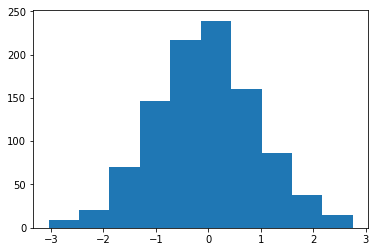

In [76]:
ns, bins, ps = plt.hist(x, bins=10)
plt.show()

In [77]:
pd.DataFrame([bins, ns/1000])

,0,1,2,3,4,5,6,7,8,9,10
0,-3.046143,-2.465593,-1.885043,-1.304494,-0.723944,-0.143394,0.437156,1.017706,1.598255,2.178805,2.759355
1,0.009000,0.020000,0.070000,0.146000,0.217000,0.239000,0.160000,0.086000,0.038000,0.015000,NaN


이 히스토그램에서 -0.143394	부터 0.437156 사이의 값이 전체의 약 24%를 차지하고 있음을 알 수 있다. 그럼 만약 -0.01	부터 0.01 사이의 구간에 대한 정보를 얻고 싶다면? 더 세부적인 구간에 대해 정보를 구하고 싶다면 히스토그램의 구간을 더 작게 나누어야 한다.

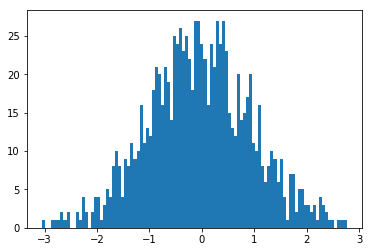

In [78]:
ns, bins, ps = plt.hist(x, bins=100)
plt.show()

In [79]:
pd.DataFrame([bins, ns/1000])

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,-3.046143,-2.988088,-2.930033,-2.871978,-2.813923,-2.755868,-2.697813,-2.639758,-2.581703,-2.523648,...,2.23686,2.294915,2.35297,2.411025,2.46908,2.527135,2.58519,2.643245,2.7013,2.759355
1,0.001000,0.000000,0.000000,0.001000,0.001000,0.001000,0.002000,0.001000,0.002000,0.000000,...,0.00400,0.003000,0.00200,0.001000,0.00100,0.000000,0.00100,0.001000,0.0010,NaN


정확한 묘사를 위해 구간의 수를 증가시키면 몇 가지 문제가 발생한다.

우선 구간의 간격이 작아지면서 하나의 구간에 있는 자료의 수가 점점 적어진다. 만약 구간 수가 무한대에 가깝다면 하나의 구간 폭은 0으로 수렴하고 해당 구간의 자료 수도 0으로 수렴할 것이다. 따라서 분포의 상대적인 모양을 살펴보기 힘들어진다. 

더 큰 문제는 분포를 묘사하기 위한 정보가 증가한다는 점이다. 데이터의 분포를 묘사하는 이유는 적은 갯수의 숫자를 통해 데이터의 전반적인 모습을 빠르게 파악하기 위한 것인데 묘사를 위한 정보의 양이 증가하면 원래의 목적을 잃어버린다.

## 확률 모형과 데이터 생성

이러한 문제를 해결하기 위해 만들어진 것이 **확률 모형**(probability model)이다. 확률 모형은 추후 설명할 확률 변수(random variable)라는 것을 이용하여 데이터 분포를 수학적으로 정의하는 방법을 말한다.

확률 모형론에서는 **데이터 그 자체에는 의미가 없으며 데이터의 분포 특성만이 중요하다**고 생각한다. 따라서 분포 특성이 같은 데이터는 실질적으로 동일한 정보를 주는 데이터라고 본다.

우리는 보통 조사(research) 과정을 통해 데이터를 하나 하나 수집한다. 이러한 과정은 주사위를 던지는 행위에 비유할 수 있다. 즉 조사를 통해 데이터를 하나 확보하는 일은 주사위를 던져 위를 향하는 눈금의 숫자를 종이에 적는 일과 같다고 보는 것이다.

예를 들어 다음 데이터를 보자.

In [80]:
x = np.array([5, 6, 1, 4, 4, 4, 2, 4, 6, 3, 5, 1, 1, 5, 3, 2, 1, 2, 6, 2, 6, 1, 2,
              5, 4, 1, 4, 6, 1, 3, 4, 1, 2, 4, 6, 4, 4, 1, 2, 2, 2, 1, 3, 5, 4, 4,
              3, 5, 3, 1, 1, 5, 6, 6, 1, 5, 2, 5, 2, 3, 3, 1, 2, 2, 2, 2, 4, 4, 3,
              4, 1, 4, 6, 5, 2, 3, 5, 4, 5, 5, 5, 4, 5, 5, 5, 1, 5, 4, 3, 6, 6, 6])

이 데이터는 사실 컴퓨터  시뮬레이션으로 만든 숫자이다. 즉, 주사위를 던져 데이터를 만드는 것과 비슷하다. 이 숫자를 만드는 코드는 아래와 같다.

In [81]:
np.random.seed(0)
np.random.randint(1, 7, 92)

array([5, 6, 1, 4, 4, 4, 2, 4, 6, 3, 5, 1, 1, 5, 3, 2, 1, 2, 6, 2, 6, 1, 2,
       5, 4, 1, 4, 6, 1, 3, 4, 1, 2, 4, 6, 4, 4, 1, 2, 2, 2, 1, 3, 5, 4, 4,
       3, 5, 3, 1, 1, 5, 6, 6, 1, 5, 2, 5, 2, 3, 3, 1, 2, 2, 2, 2, 4, 4, 3,
       4, 1, 4, 6, 5, 2, 3, 5, 4, 5, 5, 5, 4, 5, 5, 5, 1, 5, 4, 3, 6, 6, 6])

**확률 모형론을 사용한다는 것은 데이터를 생성하는 가상의 주사위가 있다고 가정하는 것과 같다.** 우리가 해야 할 일은 우리가 현재 가지고 있는 데이터와 똑같은 분포의 데이터를 만들어내는 가상의 주사위를 찾고 그 주사위를 실제로 만드는 것이다. 여기서 주의할 점은 동일한 데이터 값 하나 하나를 만들어 내는 주사위가 아니라 동일한 데이터 **분포**를 만들어내는 주사위라는 점이다.

일단 이러한 주사위를 손에 넣으면 기존에 확보한 데이터가 없어진다고 해도 큰 문제가 없다. 왜일까? 주사위를 다시 던지면 새로운 데이터를 얻을 수 있기 때문이다. 물론 이 새로운 데이터는 옛날 데이터와 값이 하나 하나 일치하지는 않는다. 하지만 옛날 데이터의 분포 특성과 새로운 데이터의 분포 특성은 같다. 그렇게 되도록 주사위를 만들어 냈기 때문이다. 

** $1$ 에서 $\infty$의 모멘트가 같다면 같은 분포를 가진다고 할 수 있다.**

**데이터를 가지고 있는 것 보다 좋은 것은 데이터를 만드는 박스를 가지고 있는 것이다. 데이터를 `재현`할 수 있다. 이 박스를 수학에서 확률변수(Random Variable)이라고 부른다.**

## 확률 변수

이렇게 특정한 분포 특성을 가지는 데이터를 만들어 내는 주사위 혹은 일종의 기계(machine)를 수학에서는 **확률 변수**(random variable)라고 한다. 

확률 변수는 수학적으로 하나의 표본에 대해 하나의  실수 숫자를 대응하는 함수로 정의하며 보통 대문자 알파벳을 사용하여 표기한다.

$$ X(\omega) : \omega \rightarrow x $$

이 식에서 $\omega$는 표본, $x$는 표본 $\omega$에 대응하는 실수 숫자(데이터), $X$는 표본과 숫자를 연결하는 확률 변수(함수)이다.

## 확률 분포 함수

그러면 확률 모형에서는 데이터를 생성하는 주사위, 즉 확률 변수의 확률적 특성은 어떻게 정의할까?

이 확률적 특성을 정의하는 것이  **확률 분포 함수**(probability distribution function) 또는 **확률 밀도 함수**(probability density function)라고 불리우는 수학 함수이다. 이 때 이 함수들의 계수를 **모수**(parameter)라고 부른다.

예를 들어 가장 널리 쓰이는 확률 모형의 하나인 가우시안 정규 분포(Gaussian normal distribution) 모형에서는 다음과 같은 수식으로 확률 밀도 함수를 정의한다.

$$ N(x; \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}\, e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

이 함수의 독립 변수는 자료의 값을 의미하는 변수 $x$이다. 식에서 사용된 문자 $\mu$와 $\sigma$는 평균(mean)과 표준편차(standard deviation)를 뜻하는 모수이다. 함수 표기에서 세미콜론(;)은 독립 변수와 모수를 구분하기 위해 사용하였다.

다음 그림은 scipy를 사용하여 평균 0, 표준편차 1인 표준 정규 분포(standard normal distribution)의 모양을 그린것이다.

In [82]:
x = np.linspace(-3, 3, 100)
y = sp.stats.norm.pdf(x)
plt.plot(x, y)
plt.show()

AttributeError: module 'scipy' has no attribute 'stats'

In [83]:
import scipy

In [ ]:
sci